# Heathy Living Predicition

The goal of the project is to create a model which will be able to predict if an article related to health or not. The chosen categories are related to health care, HEALTHY LIVING, and WELLNESS.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# !pip install ktrain
import ktrain

In [5]:
reviews = pd.read_json('../input/news-category-dataset/News_Category_Dataset_v3.json', lines=True)
reviews

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


So there are no Null values.

# Categories:

In [7]:
reviews['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

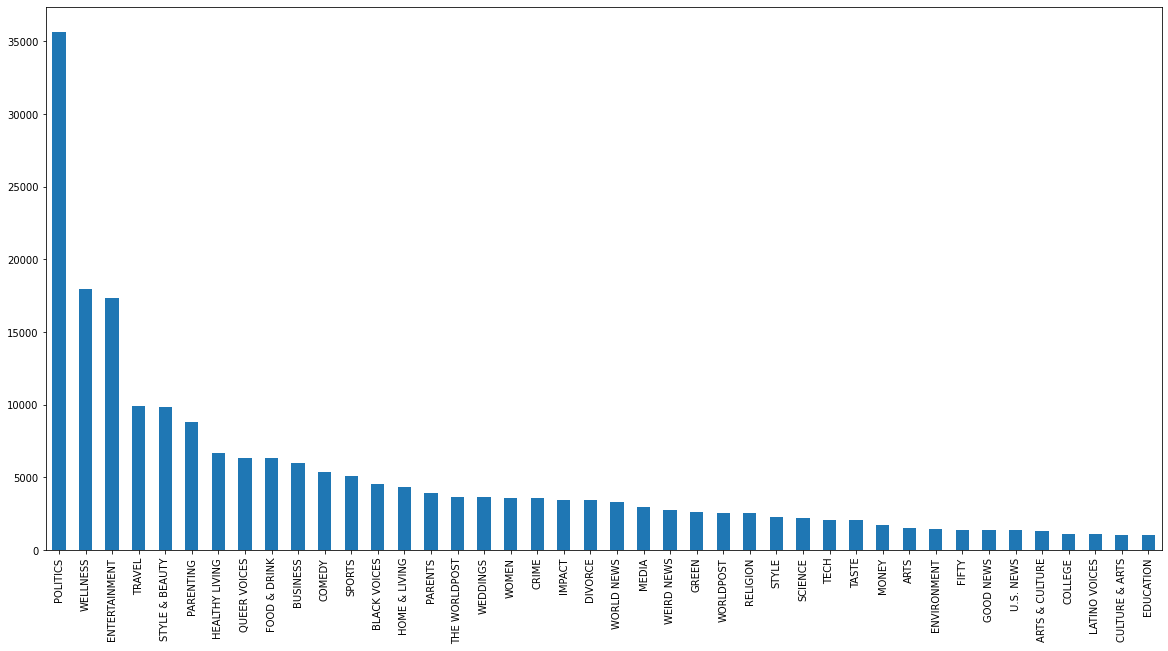

In [8]:
reviews['category'].value_counts().plot.bar(figsize=(20, 10));

In [9]:
reviews['combined_text'] = reviews['headline'] + ' ' + reviews['short_description']

We have 36620 articles without an author.

In [10]:
reviews['healthy'] = np.where((reviews['category'] == 'HEALTHY LIVING') | (reviews['category'] == 'WELLNESS'), 1, 0)

In [11]:
reviews['healthy'].describe()

count    209527.000000
mean          0.117593
std           0.322127
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: healthy, dtype: float64

In [12]:
sample_amount =  len(reviews[reviews["healthy"] == 1]) # the total number of healthy articles

healthy = reviews[reviews['healthy'] == 1].sample(n=sample_amount)
not_healthy = reviews[reviews['healthy'] == 0].sample(n=sample_amount)

In [13]:
review_sample = pd.concat([healthy,not_healthy])

In [14]:
review_sample.describe()

,healthy
count,49278.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [15]:
target_names = ['NOT HEALTHY LIVING','HEALTHY LIVING']

In [16]:
train, val, preprocess = ktrain.text.texts_from_df(
    review_sample,
    "combined_text",
    label_columns=["healthy"],
    val_df=None,
    max_features=20000,
    maxlen=512,
    val_pct=0.1,
    ngram_range=1,
    preprocess_mode="distilbert",
    verbose=1
)

['not_healthy', 'healthy']
        not_healthy  healthy
189856          0.0      1.0
20419           1.0      0.0
118180          1.0      0.0
170491          0.0      1.0
64131           1.0      0.0
['not_healthy', 'healthy']
        not_healthy  healthy
147304          0.0      1.0
171931          1.0      0.0
207276          0.0      1.0
171960          0.0      1.0
148213          0.0      1.0


Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 32
	95percentile : 58
	99percentile : 68


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 32
	95percentile : 58
	99percentile : 67


In [17]:
model = preprocess.get_classifier()
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=16)

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

In [18]:
learner.lr_find(max_epochs=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/6
2771/2771 [==============================] - 1505s 535ms/step - loss: 0.5014 - accuracy: 0.7801
Epoch 2/6
2771/2771 [==============================] - 1492s 539ms/step - loss: 0.2360 - accuracy: 0.9082
Epoch 3/6
2771/2771 [==============================] - 1492s 538ms/step - loss: 0.3802 - accuracy: 0.7882
Epoch 4/6
2771/2771 [==============================] - 1491s 538ms/step - loss: 0.6963 - accuracy: 0.4995
Epoch 5/6
2771/2771 [==============================] - 1491s 538ms/step - loss: 0.7012 - accuracy: 0.5016
Epoch 6/6
2771/2771 [==============================] - 1s 1us/step - loss: 297.6394 - accuracy: 0.4375


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


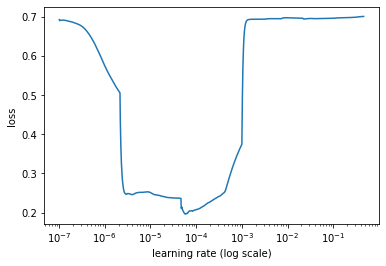

In [19]:
learner.lr_plot()

In [20]:
history=learner.autofit(
    1e-4,
    checkpoint_folder='checkpoint',
    epochs=10,
    early_stopping=True
)



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/10
2772/2772 [==============================] - 1522s 543ms/step - loss: 0.2494 - accuracy: 0.8998 - val_loss: 0.2153 - val_accuracy: 0.9184
Epoch 2/10
2772/2772 [==============================] - 1514s 543ms/step - loss: 0.1532 - accuracy: 0.9433 - val_loss: 0.2288 - val_accuracy: 0.9174
Restoring model weights from the end of the best epoch.
Epoch 00002: early stopping
Weights from best epoch have been loaded into model.


In [21]:
predictor = ktrain.get_predictor(learner.model, preproc=preprocess)

In [22]:
validation = learner.validate(val_data=val, print_report=True)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2493
           1       0.90      0.94      0.92      2435

    accuracy                           0.92      4928
   macro avg       0.92      0.92      0.92      4928
weighted avg       0.92      0.92      0.92      4928



In [23]:
!pip3 install -q git+https://github.com/amaiya/eli5@tfkeras_0_10_1

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [24]:
test_docs = [
'Stress May Be Your Heart’s Worst Enemy Psychological stress activates the fear center in the brain, setting into motion a cascade of reactions that can lead to heart attacks and strokes.',
'Exercising to Slim Down? Try Getting Bigger. It’s high time for women to reclaim the real strength behind exercise.',
'What Are Your Food Resolutions for the New Year? Join us for the Eat Well Challenge starting in January.',
'Why We All Need to Have More Fun. Prioritizing fun may feel impossible right now. But this four-step plan will help you rediscover how to feel more alive.',
'Cuomo Will Not Be Prosecuted in Groping Case, Albany D.A. Says. The district attorney described the woman who said former Gov. Andrew Cuomo had groped her as “credible,” but added that proving her allegation would be difficult.',
'A Film Captures Jewish Life in a Polish Town Before the Nazis Arrived. A documentary based on a home movie shot by an American in 1938 provides a look at the vibrancy of a Jewish community in Europe just before the Holocaust.' 
             ]

In [25]:
for i, text in enumerate(test_docs):
    probs = predictor.predict(text, return_proba=True)
    print("---------------------------")
    print('The probability this is healthy is %s' % probs[1])
    print(text)

---------------------------
The probability this is healthy is 0.99701405
Stress May Be Your Heart’s Worst Enemy Psychological stress activates the fear center in the brain, setting into motion a cascade of reactions that can lead to heart attacks and strokes.
---------------------------
The probability this is healthy is 0.99561995
Exercising to Slim Down? Try Getting Bigger. It’s high time for women to reclaim the real strength behind exercise.
---------------------------
The probability this is healthy is 0.96671325
What Are Your Food Resolutions for the New Year? Join us for the Eat Well Challenge starting in January.
---------------------------
The probability this is healthy is 0.93202883
Why We All Need to Have More Fun. Prioritizing fun may feel impossible right now. But this four-step plan will help you rediscover how to feel more alive.
---------------------------
The probability this is healthy is 0.0040798117
Cuomo Will Not Be Prosecuted in Groping Case, Albany D.A. Says. T

In [28]:
# !pip install https://github.com/amaiya/eli5-tf/archive/refs/heads/master.zip
predictor.explain('Diversity is the key to a healthy society. Here is what we need to do to make america a more equitable place to live for all.')